Kolom dataset: Index(['Id', 'Sentiment', 'Pasangan Calon', 'Text Tweet'], dtype='object')
   Id Sentiment Pasangan Calon  \
0   1  negative     Agus-Sylvi   
1   2  negative     Agus-Sylvi   
2   3  negative     Agus-Sylvi   
3   4  negative     Agus-Sylvi   
4   5  negative     Agus-Sylvi   

                                          Text Tweet  
0  Banyak akun kloning seolah2 pendukung #agussil...  
1  #agussilvy bicara apa kasihan yaa...lap itu ai...  
2  Kalau aku sih gak nunggu hasil akhir QC tp lag...  
3  Kasian oh kasian dengan peluru 1milyar untuk t...  
4  Maaf ya pendukung #AgusSilvy..hayo dukung #Ani...  

Hasil cleaning:
                                          Text Tweet Sentiment  \
0  Banyak akun kloning seolah2 pendukung #agussil...  negative   
1  #agussilvy bicara apa kasihan yaa...lap itu ai...  negative   
2  Kalau aku sih gak nunggu hasil akhir QC tp lag...  negative   
3  Kasian oh kasian dengan peluru 1milyar untuk t...  negative   
4  Maaf ya pendukung #AgusSi

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.4715 - loss: 0.7325 - val_accuracy: 0.5069 - val_loss: 0.6934
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.5042 - loss: 0.7042 - val_accuracy: 0.5417 - val_loss: 0.6930
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.4752 - loss: 0.7166 - val_accuracy: 0.4583 - val_loss: 0.7123
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.4738 - loss: 0.7225 - val_accuracy: 0.5278 - val_loss: 0.7035
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.4914 - loss: 0.7145 - val_accuracy: 0.5069 - val_loss: 0.6940
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.5299 - loss: 0.7044 - val_accuracy: 0.4722 - val_loss: 0.7271
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.5265 - loss: 0.7054 - val_accuracy: 0.4861 - val_loss: 0.7075
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.4852 - loss: 0.7396 - val_accuracy: 0.4722 - v

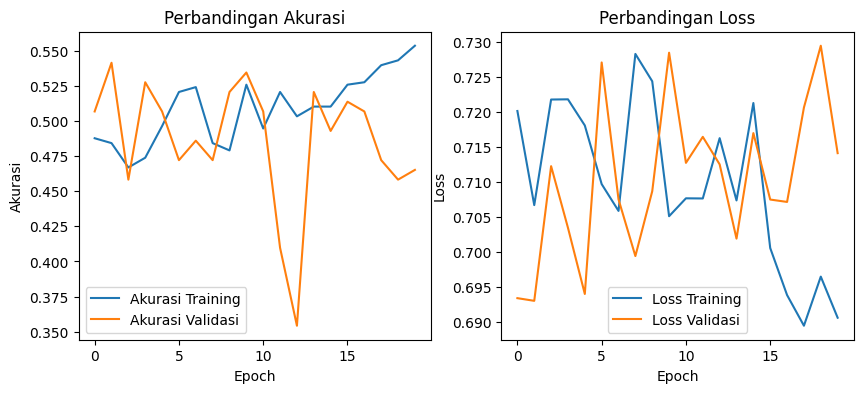

In [2]:
# ==============================================
# 🔧 1. IMPORT LIBRARY
# ==============================================
import pandas as pd
import numpy as np
import re
import nltk
import string
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

nltk.download('stopwords')

# ==============================================
# 📥 2. BACA DATASET
# ==============================================
file_path = "dataset_tweet_sentiment_pilkada_DKI_2017.csv"
data = pd.read_csv(file_path)

print("Kolom dataset:", data.columns)
print(data.head())

# Pastikan pakai kolom yang benar
data = data[['Text Tweet', 'Sentiment']].dropna()

# ==============================================
# 🧹 3. CLEANING TEKS
# ==============================================
# Buat stopwords Indonesia (tapi pertahankan kata negasi penting)
stop_words = set(stopwords.words('indonesian'))
important_words = {"tidak", "bukan", "ga", "nggak", "enggak"}
stop_words = stop_words - important_words

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'(agus|silvy|anies|sandi|ahok|djarot)', '', text)  # hapus nama paslon
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [w for w in tokens if w not in stop_words]
    return " ".join(tokens)

data['clean_text'] = data['Text Tweet'].astype(str).apply(clean_text)
print("\nHasil cleaning:")
print(data.head())

# ==============================================
# 🏷️ 4. ENCODING LABEL
# ==============================================
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['Sentiment'])
print("\nLabel unik:", label_encoder.classes_)

# ==============================================
# ⚖️ 5. BALANCING DATASET
# ==============================================
df_majority = data[data['label'] == data['label'].mode()[0]]
df_minority = data[data['label'] != data['label'].mode()[0]]

df_minority_upsampled = resample(
    df_minority,
    replace=True,
    n_samples=len(df_majority),
    random_state=42
)

data_balanced = pd.concat([df_majority, df_minority_upsampled])
print("\nSetelah balancing:")
print(data_balanced['label'].value_counts())

# ==============================================
# ✂️ 6. SPLIT DATA
# ==============================================
X_train, X_test, y_train, y_test = train_test_split(
    data_balanced['clean_text'], data_balanced['label'], test_size=0.2, random_state=42
)

# ==============================================
# 🔢 7. TOKENIZER & PADDING
# ==============================================
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# ==============================================
# 🧠 8. MODEL RNN
# ==============================================
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    SimpleRNN(128, return_sequences=True, activation='tanh'),
    Dropout(0.3),
    SimpleRNN(64, activation='tanh'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# ==============================================
# 🎯 9. TRAINING
# ==============================================
history = model.fit(
    X_train_pad, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# ==============================================
# 📊 10. EVALUASI
# ==============================================
loss, acc = model.evaluate(X_test_pad, y_test, verbose=1)
print(f"\nAkurasi Data Uji: {acc:.4f}")
print(f"Loss Data Uji: {loss:.4f}")

# ==============================================
# 📈 11. VISUALISASI HASIL TRAINING
# ==============================================
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Akurasi Training')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Perbandingan Akurasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Loss Training')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.title('Perbandingan Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [3]:
# ==============================================
# 💾 12. SIMPAN HASIL PREDIKSI KE CSV
# ==============================================
from sklearn.metrics import classification_report

# Prediksi probabilitas
y_pred_prob = model.predict(X_test_pad)

# Konversi probabilitas ke 0/1 (karena output sigmoid)
y_pred = (y_pred_prob > 0.5).astype(int)

# Gabungkan hasil ke dalam DataFrame
hasil_prediksi = pd.DataFrame({
    'Tweet Asli': X_test.values,
    'Tweet Bersih': X_test.values,  # atau data_balanced['clean_text'] kalau mau semua
    'Label Asli': label_encoder.inverse_transform(y_test),
    'Prediksi': label_encoder.inverse_transform(y_pred.flatten())
})

# Simpan ke file CSV
output_path = "hasil_prediksi_tweet_RNN1.csv"
hasil_prediksi.to_csv(output_path, index=False, encoding='utf-8')

print(f"\n✅ Hasil prediksi berhasil disimpan ke: {output_path}")

# Tampilkan contoh hasil
print("\nContoh hasil prediksi:")
print(hasil_prediksi.head(10))

# Classification report tambahan
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step

✅ Hasil prediksi berhasil disimpan ke: hasil_prediksi_tweet_RNN1.csv

Contoh hasil prediksi:
                                          Tweet Asli  \
0  ahy tim berjalan menjauh hiruk pikuk pilkada m...   
1  jeda iklan aga turun panggung debat peluk erat...   
2                      kalahpun sasaran kreator hoax   
3                        feeling sih menang pasangan   
4                        pakai sedotan sodetan versi   
5  syukur alhamdulillah kemenangan rakyat jakarta...   
6                            nasi bungkus terdeteksi   
7  nyoblos berkabung tongue memakai baju hitamata...   
8  sejujurnya penilaian subyektif cepat ahy kalah...   
9  lini pertahanan ahy rapuh debat efek aksi efek...   

                                        Tweet Bersih Label Asli  Prediksi  
0  ahy tim berjalan menjauh hiruk pikuk pilkada m...   negative  negative  
1  jeda iklan aga turun panggung debat peluk erat...   positive  negative  
2                      

Epoch 1/20


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.4669 - loss: 0.7178 - val_accuracy: 0.5069 - val_loss: 0.7064
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.5244 - loss: 0.6966 - val_accuracy: 0.5069 - val_loss: 0.6979
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.5148 - loss: 0.7119 - val_accuracy: 0.5069 - val_loss: 0.6962
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.4911 - loss: 0.7046 - val_accuracy: 0.5069 - val_loss: 0.6995
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.4822 - loss: 0.7100 - val_accuracy: 0.4931 - val_loss: 0.7053
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.4605 - loss: 0.7100 - val_accuracy: 0.5069 - val_loss: 0.6935
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.4502 - loss: 0.7008 - val_accuracy: 0.5069 - val_loss: 0.6949
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.5417 - loss: 0.6925 - val_accuracy: 0.5069 - val_loss: 0

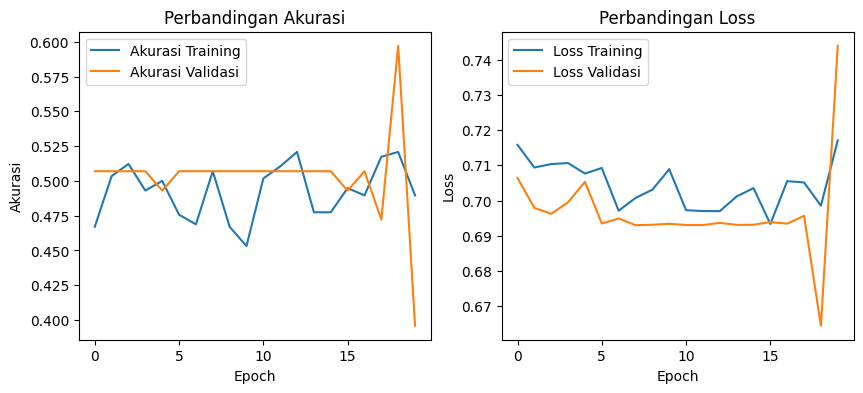

In [4]:
# ==============================================
# 🔧 1. IMPORT LIBRARY
# ==============================================
import pandas as pd
import numpy as np
import re
import nltk
import string
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from nltk.corpus import stopwords
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

nltk.download('stopwords')

# ==============================================
# 📥 2. BACA DATASET
# ==============================================
file_path = "dataset_tweet_sentiment_pilkada_DKI_2017.csv"
data = pd.read_csv(file_path)

data = data[['Text Tweet', 'Sentiment']].dropna()

# ==============================================
# 🧹 3. CLEANING TEKS
# ==============================================
stop_words = set(stopwords.words('indonesian'))
important_words = {"tidak", "bukan", "ga", "nggak", "enggak"}
stop_words = stop_words - important_words

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'(agus|silvy|anies|sandi|ahok|djarot)', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [w for w in tokens if w not in stop_words]
    return " ".join(tokens)

data['clean_text'] = data['Text Tweet'].astype(str).apply(clean_text)

# ==============================================
# 🏷️ 4. ENCODING LABEL
# ==============================================
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['Sentiment'])

# ==============================================
# ⚖️ 5. BALANCING DATASET
# ==============================================
df_majority = data[data['label'] == data['label'].mode()[0]]
df_minority = data[data['label'] != data['label'].mode()[0]]

df_minority_upsampled = resample(
    df_minority,
    replace=True,
    n_samples=len(df_majority),
    random_state=42
)

data_balanced = pd.concat([df_majority, df_minority_upsampled])

# ==============================================
# ✂️ 6. SPLIT DATA
# ==============================================
X_train, X_test, y_train, y_test = train_test_split(
    data_balanced['clean_text'], data_balanced['label'], test_size=0.2, random_state=42
)

# ==============================================
# 🔢 7. TOKENIZER & PADDING
# ==============================================
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# ==============================================
# 🧠 8. MODEL RNN
# ==============================================
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    SimpleRNN(128, return_sequences=True, activation='tanh'),
    Dropout(0.3),
    SimpleRNN(64, activation='tanh'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# ==============================================
# 🎯 9. TRAINING
# ==============================================
history = model.fit(
    X_train_pad, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# ==============================================
# 📊 10. EVALUASI
# ==============================================
loss, acc = model.evaluate(X_test_pad, y_test, verbose=1)
print(f"\nAkurasi Data Uji: {acc:.4f}")
print(f"Loss Data Uji: {loss:.4f}")

# ==============================================
# 11. PREDIKSI PADA DATA UJI
# ==============================================
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int)

results = pd.DataFrame({
    'Tweet Asli': X_test.values,
    'Clean Tweet': X_test,
    'Label Sebenarnya': label_encoder.inverse_transform(y_test),
    'Prediksi': label_encoder.inverse_transform(y_pred.flatten())
})

# Tampilkan 10 baris pertama
print("\nContoh Hasil Prediksi:")
print(results.head(10))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# ==============================================
# 📈 12. VISUALISASI HASIL TRAINING
# ==============================================
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Akurasi Training')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Perbandingan Akurasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Loss Training')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.title('Perbandingan Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [5]:
# ==============================================
# 💾 SIMPAN HASIL PREDIKSI KE CSV
# ==============================================
output_path = "hasil_prediksi_tweet_RNN.csv"
results.to_csv(output_path, index=False, encoding='utf-8')
print(f"\nHasil prediksi berhasil disimpan ke: {output_path}")



Hasil prediksi berhasil disimpan ke: hasil_prediksi_tweet_RNN.csv


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 100, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ (None, 100, 128)       │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,329,473 (5.07 MB)

 Trainable params: 1,329,473 (5.07 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.4639 - loss: 0.7381 - val_accuracy: 0.4931 - val_loss: 0.6946
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.4303 - loss: 0.7324 - val_accuracy: 0.5069 - val_loss: 0.6932
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.4652 - loss: 0.7170 - val_accuracy: 0.4931 - val_loss: 0.7401
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.5369 - loss: 0.7088 - val_accuracy: 0.4028 - val_loss: 0.7142
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.5276 - loss: 0.7091 - val_accuracy: 0.4167 - val_loss: 0.7170
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.5282 - loss: 0.6963 - val_accuracy: 0.5069 - val_loss: 0.6927
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.5018 - loss: 0.7225 - val_accuracy: 0.4167 - val_loss: 0.7198
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.4724 - loss: 0.7154 - val_accuracy: 0.4097 - 

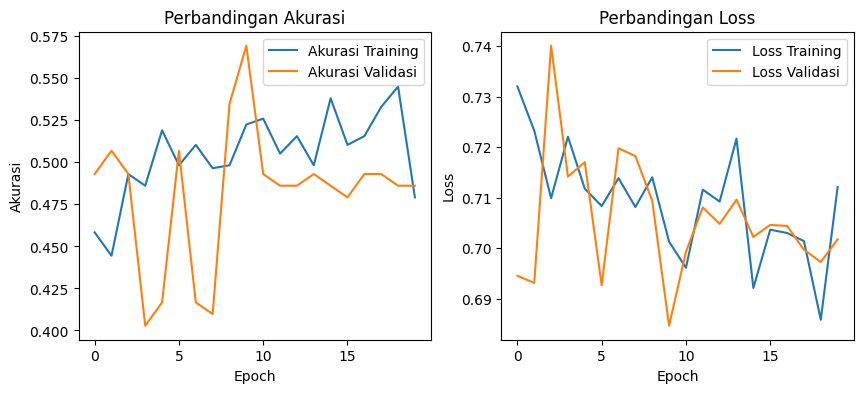

In [6]:
# ==============================================
# 🔧 1. IMPORT LIBRARY
# ==============================================
import pandas as pd
import numpy as np
import re
import nltk
import string
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

nltk.download('stopwords')

# ==============================================
# 📥 2. BACA DATASET
# ==============================================
file_path = "dataset_tweet_sentiment_pilkada_DKI_2017.csv"
data = pd.read_csv(file_path)

# Pastikan pakai kolom yang benar
data = data[['Text Tweet', 'Sentiment']].dropna()

# ==============================================
# 🧹 3. CLEANING TEKS
# ==============================================
stop_words = set(stopwords.words('indonesian'))
important_words = {"tidak", "bukan", "ga", "nggak", "enggak"}
stop_words = stop_words - important_words

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'(agus|silvy|anies|sandi|ahok|djarot)', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [w for w in tokens if w not in stop_words]
    return " ".join(tokens)

data['clean_text'] = data['Text Tweet'].astype(str).apply(clean_text)

# ==============================================
# 🏷️ 4. ENCODING LABEL
# ==============================================
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['Sentiment'])

# ==============================================
# ⚖️ 5. BALANCING DATASET
# ==============================================
df_majority = data[data['label'] == data['label'].mode()[0]]
df_minority = data[data['label'] != data['label'].mode()[0]]

df_minority_upsampled = resample(
    df_minority,
    replace=True,
    n_samples=len(df_majority),
    random_state=42
)

data_balanced = pd.concat([df_majority, df_minority_upsampled])

# ==============================================
# ✂️ 6. SPLIT DATA
# ==============================================
X_train, X_test, y_train, y_test = train_test_split(
    data_balanced['clean_text'], data_balanced['label'], test_size=0.2, random_state=42
)

# ==============================================
# 🔢 7. TOKENIZER & PADDING
# ==============================================
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# ==============================================
# 🧠 8. MODEL RNN
# ==============================================
model = Sequential([
    Embedding(input_dim=10000, output_dim=128),  # hilangkan input_length
    SimpleRNN(128, return_sequences=True, activation='tanh'),
    Dropout(0.3),
    SimpleRNN(64, activation='tanh'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Build model agar summary muncul parameter
model.build(input_shape=(None, max_len))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# ==============================================
# 🎯 9. TRAINING
# ==============================================
history = model.fit(
    X_train_pad, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# ==============================================
# 📊 10. EVALUASI
# ==============================================
loss, acc = model.evaluate(X_test_pad, y_test, verbose=1)
print(f"\nAkurasi Data Uji: {acc:.4f}")
print(f"Loss Data Uji: {loss:.4f}")

# ==============================================
# 📈 11. VISUALISASI HASIL TRAINING
# ==============================================
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Akurasi Training')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Perbandingan Akurasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Loss Training')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.title('Perbandingan Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 100, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 100, 256)       │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        82,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,629,569 (6.22 MB)

 Trainable params: 1,629,569 (6.22 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 453ms/step - accuracy: 0.4423 - loss: 0.6963 - val_accuracy: 0.4931 - val_loss: 0.6932
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 351ms/step - accuracy: 0.4744 - loss: 0.6947 - val_accuracy: 0.4931 - val_loss: 0.6937
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 422ms/step - accuracy: 0.4788 - loss: 0.6942 - val_accuracy: 0.4931 - val_loss: 0.6936
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 364ms/step - accuracy: 0.5318 - loss: 0.6923 - val_accuracy: 0.5069 - val_loss: 0.6931
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 435ms/step - accuracy: 0.5218 - loss: 0.6934 - val_accuracy: 0.4931 - val_loss: 0.6938
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 355ms/step - accuracy: 0.5244 - loss: 0.6924 - val_accuracy: 0.5069 - val_loss: 0.6931
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 408ms/step - accuracy: 0.5029 - loss: 0.6932 - val_accuracy: 0.4931 - val_loss: 0.6936
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 413ms/step - accuracy: 0.5065 - loss: 0.6944 - val_accuracy: 0

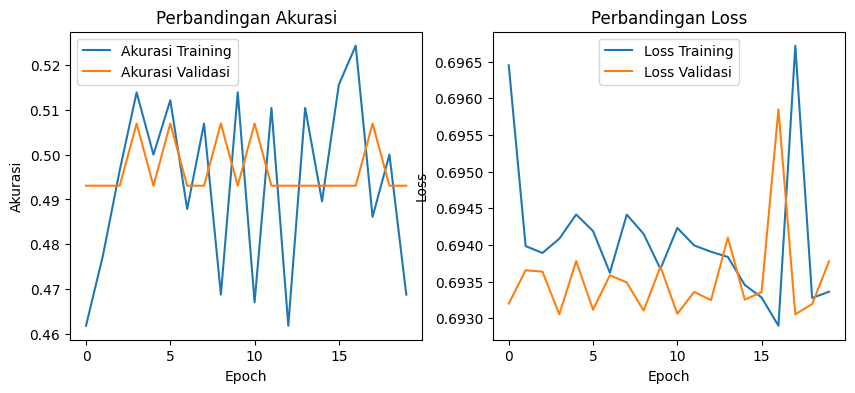

In [7]:
# ==============================================
# 🔧 1. IMPORT LIBRARY
# ==============================================
import pandas as pd
import numpy as np
import re
import nltk
import string
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

nltk.download('stopwords')

# ==============================================
# 📥 2. BACA DATASET
# ==============================================
file_path = "dataset_tweet_sentiment_pilkada_DKI_2017.csv"
data = pd.read_csv(file_path)

# Pilih kolom yang diperlukan
data = data[['Text Tweet', 'Sentiment']].dropna()

# ==============================================
# 🧹 3. CLEANING TEKS
# ==============================================
stop_words = set(stopwords.words('indonesian'))
important_words = {"tidak", "bukan", "ga", "nggak", "enggak"}
stop_words = stop_words - important_words

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'(agus|silvy|anies|sandi|ahok|djarot)', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [w for w in tokens if w not in stop_words]
    return " ".join(tokens)

data['clean_text'] = data['Text Tweet'].astype(str).apply(clean_text)

# ==============================================
# 🏷️ 4. ENCODING LABEL
# ==============================================
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['Sentiment'])

# ==============================================
# ⚖️ 5. BALANCING DATASET
# ==============================================
df_majority = data[data['label'] == data['label'].mode()[0]]
df_minority = data[data['label'] != data['label'].mode()[0]]

df_minority_upsampled = resample(
    df_minority,
    replace=True,
    n_samples=len(df_majority),
    random_state=42
)

data_balanced = pd.concat([df_majority, df_minority_upsampled])

# ==============================================
# ✂️ 6. SPLIT DATA
# ==============================================
X_train, X_test, y_train, y_test = train_test_split(
    data_balanced['clean_text'], data_balanced['label'], test_size=0.2, random_state=42
)

# ==============================================
# 🔢 7. TOKENIZER & PADDING
# ==============================================
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# ==============================================
# 🧠 8. MODEL LSTM
# ==============================================
model = Sequential([
    Embedding(input_dim=10000, output_dim=128),
    Bidirectional(LSTM(128, return_sequences=True, activation='tanh')),
    Dropout(0.3),
    LSTM(64, activation='tanh'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Build agar summary muncul
model.build(input_shape=(None, max_len))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# ==============================================
# 🎯 9. TRAINING
# ==============================================
history = model.fit(
    X_train_pad, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# ==============================================
# 📊 10. EVALUASI
# ==============================================
loss, acc = model.evaluate(X_test_pad, y_test, verbose=1)
print(f"\nAkurasi Data Uji: {acc:.4f}")
print(f"Loss Data Uji: {loss:.4f}")

# ==============================================
# 📈 11. VISUALISASI HASIL TRAINING
# ==============================================
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Akurasi Training')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Perbandingan Akurasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Loss Training')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.title('Perbandingan Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 50, 128)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 779,905 (2.98 MB)

 Trainable params: 779,905 (2.98 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.4841 - loss: 0.6972 - val_accuracy: 0.4931 - val_loss: 0.6939
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.5156 - loss: 0.6934 - val_accuracy: 0.5139 - val_loss: 0.6931
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - accuracy: 0.4341 - loss: 0.6954 - val_accuracy: 0.4931 - val_loss: 0.6950
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.4964 - loss: 0.6957 - val_accuracy: 0.4931 - val_loss: 0.6938
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.4888 - loss: 0.6953 - val_accuracy: 0.4931 - val_loss: 0.6945
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5159 - loss: 0.6931

Akurasi Data Uji: 0.5056
Loss Data Uji: 0.6932


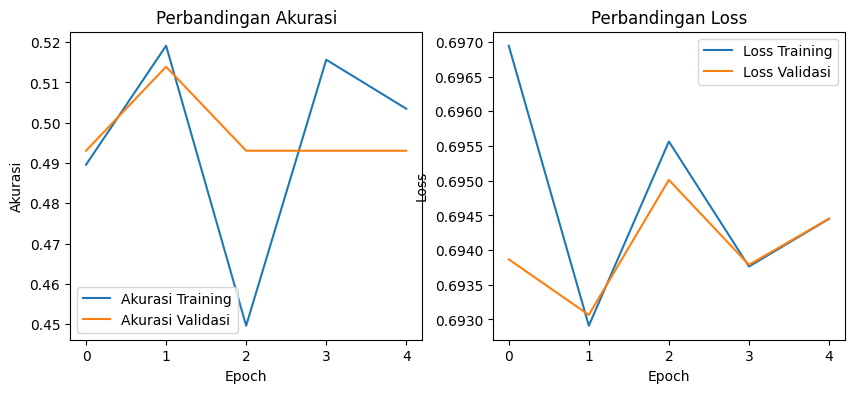

In [8]:
# ==============================================
# 🔧 1. IMPORT LIBRARY
# ==============================================
import pandas as pd
import numpy as np
import re
import string
import nltk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

nltk.download('stopwords')

# ==============================================
# 📥 2. BACA DATASET
# ==============================================
file_path = "dataset_tweet_sentiment_pilkada_DKI_2017.csv"
data = pd.read_csv(file_path)

data = data[['Text Tweet', 'Sentiment']].dropna()

# ==============================================
# 🧹 3. CLEANING TEKS
# ==============================================
stop_words = set(stopwords.words('indonesian'))
important_words = {"tidak", "bukan", "ga", "nggak", "enggak"}
stop_words = stop_words - important_words

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'(agus|silvy|anies|sandi|ahok|djarot)', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [w for w in tokens if w not in stop_words]
    return " ".join(tokens)

data['clean_text'] = data['Text Tweet'].astype(str).apply(clean_text)

# ==============================================
# 🏷️ 4. ENCODING LABEL
# ==============================================
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['Sentiment'])

# ==============================================
# ⚖️ 5. BALANCING DATASET
# ==============================================
df_majority = data[data['label'] == data['label'].mode()[0]]
df_minority = data[data['label'] != data['label'].mode()[0]]

df_minority_upsampled = resample(
    df_minority,
    replace=True,
    n_samples=len(df_majority),
    random_state=42
)

data_balanced = pd.concat([df_majority, df_minority_upsampled])

# ==============================================
# ✂️ 6. SPLIT DATA
# ==============================================
X_train, X_test, y_train, y_test = train_test_split(
    data_balanced['clean_text'], data_balanced['label'], test_size=0.2, random_state=42
)

# ==============================================
# 🔢 7. TOKENIZER & PADDING
# ==============================================
num_words = 5000
max_len = 50

tokenizer = Tokenizer(num_words=num_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# ==============================================
# 🧠 8. MODEL LSTM
# ==============================================
model = Sequential([
    Embedding(input_dim=num_words, output_dim=128),  # input_length dihilangkan
    LSTM(128, activation='tanh'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# build model supaya summary muncul lengkap
model.build(input_shape=(None, max_len))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


# ==============================================
# 🎯 9. TRAINING
# ==============================================
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train_pad, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# ==============================================
# 📊 10. EVALUASI
# ==============================================
loss, acc = model.evaluate(X_test_pad, y_test, verbose=1)
print(f"\nAkurasi Data Uji: {acc:.4f}")
print(f"Loss Data Uji: {loss:.4f}")

# ==============================================
# 📈 11. VISUALISASI HASIL TRAINING
# ==============================================
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Akurasi Training')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Perbandingan Akurasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Loss Training')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.title('Perbandingan Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 349ms/step - accuracy: 0.5179 - loss: 0.6920 - val_accuracy: 0.5833 - val_loss: 0.6747
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 251ms/step - accuracy: 0.6217 - loss: 0.6655 - val_accuracy: 0.7569 - val_loss: 0.6087
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 286ms/step - accuracy: 0.8360 - loss: 0.4742 - val_accuracy: 0.7222 - val_loss: 0.5452
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 255ms/step - accuracy: 0.9328 - loss: 0.2061 - val_accuracy: 0.7778 - val_loss: 0.4747
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 322ms/step - accuracy: 0.9884 - loss: 0.0821 - val_accuracy: 0.8333 - val_loss: 0.5444
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 267ms/step - accuracy: 0.9917 - loss: 0.0336 - val_accuracy: 0.7708 - val_loss: 0.6227
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 340ms/step - accuracy: 0.9929 - loss: 0.0209 - val_accuracy: 0.8056 - val_loss: 0.6440
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 250ms/step - accuracy: 0.9912 - loss: 0.0231 - val_accuracy: 

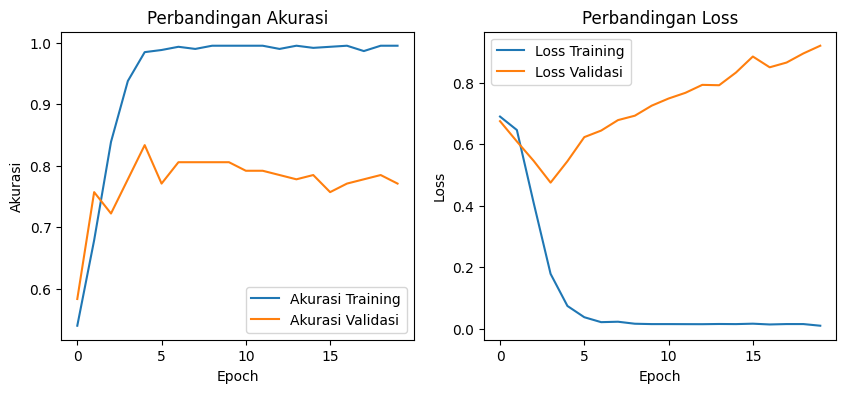

In [9]:
# ==============================================
# 🔧 1. IMPORT LIBRARY
# ==============================================
import pandas as pd
import numpy as np
import re
import string
import nltk
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

nltk.download('stopwords')

# ==============================================
# 📥 2. BACA DATASET
# ==============================================
file_path = "dataset_tweet_sentiment_pilkada_DKI_2017.csv"
data = pd.read_csv(file_path)
data = data[['Text Tweet', 'Sentiment']].dropna()

# ==============================================
# 🧹 3. CLEANING TEKS
# ==============================================
stop_words = set(stopwords.words('indonesian'))
important_words = {"tidak", "bukan", "ga", "nggak", "enggak"}
stop_words = stop_words - important_words

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'(agus|silvy|anies|sandi|ahok|djarot)', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [w for w in tokens if w not in stop_words]
    return " ".join(tokens)

data['clean_text'] = data['Text Tweet'].astype(str).apply(clean_text)

# ==============================================
# 🏷️ 4. ENCODING LABEL
# ==============================================
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['Sentiment'])

# ==============================================
# ⚖️ 5. BALANCING DATASET
# ==============================================
df_majority = data[data['label'] == data['label'].mode()[0]]
df_minority = data[data['label'] != data['label'].mode()[0]]

df_minority_upsampled = resample(
    df_minority,
    replace=True,
    n_samples=len(df_majority),
    random_state=42
)

data_balanced = pd.concat([df_majority, df_minority_upsampled])

# ==============================================
# ✂️ 6. SPLIT DATA
# ==============================================
X_train, X_test, y_train, y_test = train_test_split(
    data_balanced['clean_text'], data_balanced['label'], test_size=0.2, random_state=42
)

# ==============================================
# 🔢 7. TOKENIZER & PADDING
# ==============================================
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# ==============================================
# 🧠 8. MODEL BIDIRECTIONAL LSTM
# ==============================================
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(128, return_sequences=False)),  # jika mau LSTM bertumpuk bisa return_sequences=True
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# ==============================================
# 🎯 9. TRAINING
# ==============================================
history = model.fit(
    X_train_pad, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# ==============================================
# 📊 10. EVALUASI
# ==============================================
loss, acc = model.evaluate(X_test_pad, y_test, verbose=1)
print(f"\nAkurasi Data Uji: {acc:.4f}")
print(f"Loss Data Uji: {loss:.4f}")

# ==============================================
# 📈 11. VISUALISASI HASIL TRAINING
# ==============================================
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Akurasi Training')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Perbandingan Akurasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Loss Training')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.title('Perbandingan Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
